In [402]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [403]:
# Use ipywidgets to create the drop downs
import ipywidgets as widgets

In [404]:
# set the display option to show all columns
pd.set_option('display.max_columns', None)

In [405]:
# read cleaned data

df= pd.read_csv('Cleaned FIFA 2021 data.csv')
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,Positions,Height (cm),Weight (kg),Preferred Foot,BOV,Best Position,Joined,Value (€),Wage (€),Release Clause (€),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Name in Long Name,BestPosition in Position,Contract Start,Contract End,Contract Type,Playing Years
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,"RW, ST, CF",170,72,Left,93,RW,2004-07-01,103500000,560000,138400000,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771,True,True,2004,2021,On Contract,19
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,"ST, LW",187,83,Right,92,ST,2018-07-10,63000000,220000,75900000,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562,True,True,2018,2022,On Contract,5
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,GK,188,87,Right,91,GK,2014-07-16,120000000,125000,159400000,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150,True,True,2014,2023,On Contract,9
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,"CAM, CM",181,70,Right,91,CAM,2015-08-30,129000000,370000,161000000,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207,True,True,2015,2023,On Contract,8
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,"LW, CAM",175,68,Right,91,LW,2017-08-03,132000000,270000,166500000,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595,True,True,2017,2022,On Contract,6


### 1. Contract Types

Text(0, 0.5, 'Total')

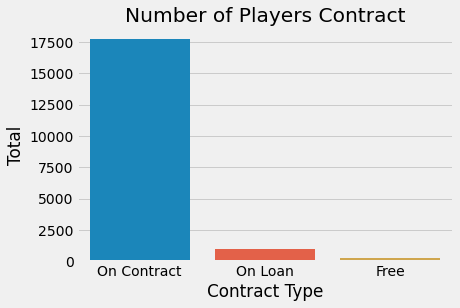

In [406]:
# count type of contracts and visualize

sns.countplot(x = df['Contract Type'] )
plt.title('Number of Players Contract')
plt.ylabel('Total')

### 2. View Clubs and different nationality with Name(x) -Age, hits, foot p.,best position 

In [553]:
# Pick needed columns

clubs = df[['Name', 'Nationality', 'Age', 'Club', 'Preferred Foot', 'Best Position', 'Hits' ]]

In [524]:
pivot = pd.pivot_table(clubs, values=['Age', 'Hits'], index=['Club', 'Nationality', 'Name'])

In [450]:
#sel_col = widgets.Dropdown(options = club)

In [538]:
def sel(club = None, nat = None, value = None):
    clubs = df[['Name', 'Nationality', 'Age', 'Club', 'Preferred Foot', 'Best Position', 'Hits' ]].head(20)
    pivot = pd.pivot_table(clubs, values=['Age', 'Hits'], index=['Club', 'Nationality', 'Name']).head(20)
    
    sns.barplot(x = value, y = 'Club'  , data = clubs)
    plt.title('Club')
    
clb = clubs['Club'].sort_values().unique().tolist()[210:230]
nationalities = clubs['Nationality'].sort_values().unique().tolist()[:30]
names = clubs['Name'].sort_values().unique().tolist()

club_selector =  widgets.Dropdown(options = [''] + clb, description='Club:')
nat_selector = widgets.Dropdown(options=[''] + nationalities, description='Nationality:')
#name_selector = widgets.Dropdown(options=[''] + names, description='Name:')
val_selector =  widgets.Dropdown(options= ['Age', 'Hits'], value='Age', description='Values')

widgets.interact(sel, club=club_selector, nat=nat_selector, value=val_selector)
plt.show()

interactive(children=(Dropdown(description='Club:', options=('', 'Exeter City', 'FC Admira Wacker Mödling', 'F…

In [430]:
def sel(club = None, nat = None, name = None):
    clubs = df[['Name', 'Nationality', 'Age', 'Club', 'Preferred Foot', 'Best Position', 'Hits' ]].sample(5).reset_index()
    pivot = pd.pivot_table(clubs, values=['Age', 'Hits'], index=['Club', 'Nationality', 'Name']).sample(5).reset_index()
        
    sns.barplot(x = 'Club', y = 'Age' , data = clubs)
    
clb = clubs['Club'].sort_values().unique().tolist()
nationalities = clubs['Nationality'].sort_values().unique().tolist()
names = clubs['Name'].sort_values().unique().tolist()

club_selector =  widgets.Dropdown(options = [''] + clb, description='Club:')
nat_selector = widgets.Dropdown(options=[''] + nationalities, description='Nationality:')
name_selector = widgets.Dropdown(options=[''] + names, description='Name:')

widgets.interact(sel, club=club_selector, nat=nat_selector, name = name_selector)
plt.show()

In [ ]:
# Define a function to plot the graph based on the selected drop down values
def plot_graph(selected_club=None):
    pivot2 = pd.pivot_table(clubs, values=['Age', 'Hits'], index=['Club', 'Nationality', 'Name'])    
    # Filter the data based on the selected drop down values
    filtered_data = pivot2.copy()
    if selected_club:
        filtered_data = filtered_data.loc[selected_club]

    # Plot the graph using Seaborn
    sns.scatterplot(data=filtered_data, x='Hits', y='Age')

# Get the unique values for each drop down
club2 = clubs['Club'].sort_values().unique().tolist()[210:230]

# Create the drop downs and link them to the plot function
club_dropdown = widgets.Dropdown(options=[''] + club2, description='Club:')

widgets.interact(plot_graph, selected_club=club_dropdown)

# Show the plot
plt.show()


In [ ]:
def sel_col(club = None , values = None):
    clubs = df[['Name', 'Nationality', 'Age', 'Club', 'Preferred Foot', 'Best Position', 'Hits' ]].head().reset_index()
    
    fil_data = clubs.copy()
    if club:
        fil_data = fil_data.loc[club]
        
    sns.barplot(x = club, y = values ,data = clubs)

clb = clubs['Club'].sort_values().unique().tolist()

club_selector =  widgets.Dropdown(
    options = ['Club'],
    description='Club:')

val_selector =  widgets.Dropdown(
    options= ['Age', 'Hits'],
    value='Age',
    description='Values')

In [ ]:
# Define a function to plot the graph based on the selected drop down values
def plot_graph(selected_club=None, selected_nationality=None, selected_name=None):
    # Filter the data based on the selected drop down values
    filtered_data = pivot.copy()
    if selected_club:
        filtered_data = filtered_data.loc[selected_club]
    if selected_nationality:
        filtered_data = filtered_data.loc[selected_nationality]
    if selected_name:
        filtered_data = filtered_data.loc[selected_name]

    # Plot the graph using Seaborn
    sns.scatterplot(data=filtered_data, x='Age', y='Hits')

    # Set the title and axis labels
    plt.title('Hits vs Age')
    plt.xlabel('Age')
    plt.ylabel('Hits')

# Get the unique values for each drop down
club = clubs['Club'].sort_values().unique().tolist()
nationalities = clubs['Nationality'].sort_values().unique().tolist()
names = clubs['Name'].sort_values().unique().tolist()

# Create the drop downs and link them to the plot function
club_dropdown = widgets.Dropdown(options=[''] + club, description='Club:')
nationality_dropdown = widgets.Dropdown(options=[''] + nationalities, description='Nationality:')
name_dropdown = widgets.Dropdown(options=[''] + names, description='Name:')

widgets.interact(plot_graph, selected_club=club_dropdown, selected_nationality=nationality_dropdown, selected_name=name_dropdown)

# Show the plot
plt.show()


In [ ]:
write a code using seaborn to plot a graph with 'Club', 'Nationality', and ' Name' as drop downs, where the graph changes depending on the clicked drop down. Also 'Club', 'Nationality', and ' Name'should be values for the x axis while 'Age' and 'Hits' should be for the y axis

#### 2.1

In [ ]:
pivot2 = pd.pivot_table(clubs, values=['Hits'], index=['Club', 'Name', 'Best Position', 'Preferred Foot'])

In [ ]:
df['Club']

In [808]:
#3

output = widgets.Output()
plot_output = widgets.Output()

club_select = widgets.Dropdown(options=unique_sorted(clubs['Club']))
nat_select = widgets.Dropdown(options=unique_sorted(clubs['Nationality']))
plot_select =  widgets.Dropdown(options=['Age', 'Hits'], description='Plot')

def club_nat_filter(club, nationality, plot):
    output.clear_output()
    plot_output.clear_output()
    
    if (club == All) & (nationality == All):
        club_nat = clubs
        
    elif (club == All):
        club_nat = clubs[clubs['Nationality'] == nationality]
        
    elif (nationality == All):
        club_nat = clubs[clubs['Club'] == club]
        
    else:
        club_nat = clubs[(clubs['Club'] == club) & (clubs['Nationality'] == nationality)]
        
    with output:
        display(club_nat)
        
    with plot_output:
        if plot == 'Age':
            sns.barplot(x = club_nat['Age'], y = club_nat['Name'])
            plt.show()
        elif plot == 'Hits':
            sns.barplot(x = club_nat['Hits'], y = club_nat['Name'])
            plt.show()
            
def club_change(change):
    club_nat_filter(change.new, nat_select.value,plot_select.value)
    
def nat_change(change):
    club_nat_filter(club_select.value, change.new,plot_select.value)

def plot_change(change):
    club_nat_filter(club_select.value, nat_select.value,change.new)
    
        
club_select.observe(club_change, names = 'value')
nat_select.observe(nat_change, names = 'value')
plot_select.observe(plot_change, names = 'value')

input_widgets = widgets.HBox([club_select, nat_select, plot_select])

display(input_widgets)
display(output)

Output()

In [809]:
display(plot_output)

Output()

In [647]:
#4 

plot_output = widgets.Output()
plot_output.clear_output()

with plot_output:
    sns.kdeplot(club_nat['Club'])   
    plt.show()
    
display(output)
display(plot_output)

Output()

Output()

In [ ]:
#5

tab = widgets.Tab([output, plot_output],layout=item_layout)
tab.set_title(0, 'Dataset Exploration')
tab.set_title(1, 'KDE Plot')
display(tab)

dashboard = widgets.VBox([input_widgets, tab],layout=item_layout)
display(dashboard)

item_layout = widgets.Layout(margin='0 0 50px 0')

In [618]:
sns.barplot(data = x, x='Name', y='Age')

In [ ]:
output = widgets.Output()
plot_output = widgets.Output()

club_select = widgets.Dropdown(options=unique_sorted(clubs['Club']))
nat_select = widgets.Dropdown(options=unique_sorted(clubs['Nationality']))
plot_select =  widgets.Dropdown(options=['Age', 'Hits'], description='Plot')

def get_nationalities_in_club(club):
    output.clear_output()
    plot_output.clear_output()
    
    if club == 'All':
        return unique_sorted(clubs['Nationality'])
    else:
        return unique_sorted(clubs[clubs['Club'] == club]['Nationality'])

def club_nat_filter(club, nationality, plot):
    output.clear_output()
    plot_output.clear_output()
    
    if club == 'All':
        club_nat = clubs
        nat_options = get_nationalities_in_club('All')
    else:
        club_nat = clubs[clubs['Club'] == club]
        nat_options = get_nationalities_in_club(club)
    
    nat_select.options = nat_options
    
    if (nationality == 'All'):
        club_nat = clubs[clubs['Club'] == club]
    else:
        club_nat = clubs[(clubs['Club'] == club) & (clubs['Nationality'] == nationality)]
        
    with output:
        display(club_nat)
        
    with plot_output:
        if plot == 'Age':
            sns.barplot(x = club_nat['Age'], y = club_nat['Name'])
            plt.show()
        elif plot == 'Hits':
            sns.barplot(x = club_nat['Hits'], y = club_nat['Name'])
            plt.show()
            
def club_change(change):
    club_nat_filter(change.new, nat_select.value, plot_select.value)
    
def nat_change(change):
    club_nat_filter(club_select.value, change.new, plot_select.value)

def plot_change(change):
    club_nat_filter(club_select.value, nat_select.value, change.new)
    
        
club_select.observe(club_change, names='value')
nat_select.observe(nat_change, names='value')
plot_select.observe(plot_change, names='value')

input_widgets = widgets.HBox([club_select, nat_select, plot_select])

display(input_widgets)
display(output)